# Data Preprocessing

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Data.csv')

In [ ]:
print(dataset)
# print(X)
# print(y)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


### Data Imputation (Missing Data Replacement)
Datasets often have missing values and this can cause problems for machine learning algorithms. It is considered good practise to identify and replace missing values in each column of your dateset prior to performing predictive modelling. This method of missing data replacement is referred to as data imputation.

In [ ]:
for i in range(len(dataset.columns)):
    missing_data = dataset[dataset.columns[i]].isna().sum()
    perc = missing_data / len(dataset) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 1, percentage 10.00
>2,  missing entries: 1, percentage 10.00
>3,  missing entries: 0, percentage 0.00


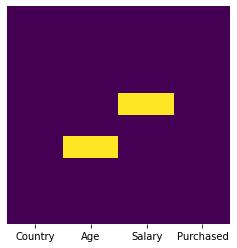

In [ ]:
plt.figure(figsize = (4,4)) #is to create a figure object with a given size
sns.heatmap(dataset.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
#convert the dataframe into a numpy array by calling values on my dataframe (not necessary), but a habit I prefer
X= dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.impute import SimpleImputer

#Tạo một phiên bản của Class SimpleImputer: np.nan là giá trị trống trong tập dữ liệu
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Thay thế giá trị bị thiếu từ số Col 1 'Tuổi', Col 2 'Lương'
#fit trên tập dữ liệu để tính toán thống kê cho từng cột
imputer.fit(X[:, 1:3])

# Sau đó, bộ xâm nhập phù hợp được áp dụng cho tập dữ liệu
# để tạo bản sao của tập dữ liệu với tất cả các giá trị bị thiếu
# cho mỗi cột được thay thế bằng thống kê trung bình được tính toán.
#transform sẽ thay thế và trả về các cột mới được cập nhật
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encode Categorical Data
#### Encode Independent variable (X)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#transformers: chỉ định loại biến đổi và cols nào #Tuple (chuyển đổi mã hóa 'encoder', phiên bản của Class OneHotEncoder, [col to biến đổi])
#remainder = "passthrough"> để giữ cho cols không bị biến đổi. Nếu không, những con cols còn lại sẽ không được bao gồm
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])] , remainder="passthrough" )
#fit và biến đổi với input = X
# np.array: cần chuyển đổi đầu ra của fit_transform () từ ma trận thành np.array
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


#### Encode Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output of fit_transform of Label Encoder is already a Numpy Array
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset (X = data, y = output) into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


## Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
#chỉ sử dụng Biến đổi để sử dụng bộ chia tỷ lệ CÙNG làm Bộ đào tạo
X_test[:,3:] = sc.transform(X_test[:,3:])

In [ ]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]



## 5. Training Machine Learning Model


In [ ]:
## Models from Scikit-Learn: Search "scikit learn model map"
from sklearn.linear_model import LogisticRegression


In [ ]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

LogisticRegression()

#### 5.1. Evaluate the model

Now we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good our model is.

Each model or estimator has a built-in score method. This method compares how well the model was able to learn the patterns between the features and labels. In other words, it returns how accurate your model is.

In [ ]:
# Evaluate the model on the training set
logistic_clf.score(X_train, y_train)

0.75

In [ ]:
# Evaluate the model on the test set
logistic_clf.score(X_test, y_test)

0.5

In [ ]:
y_preds = logistic_clf.predict(X_test)
y_preds

array([1, 1])

In [ ]:
y_test

array([0, 1])

In [ ]:
#Predict with a single input
logistic_clf.predict([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425]])

array([0])